# Section 16.7

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

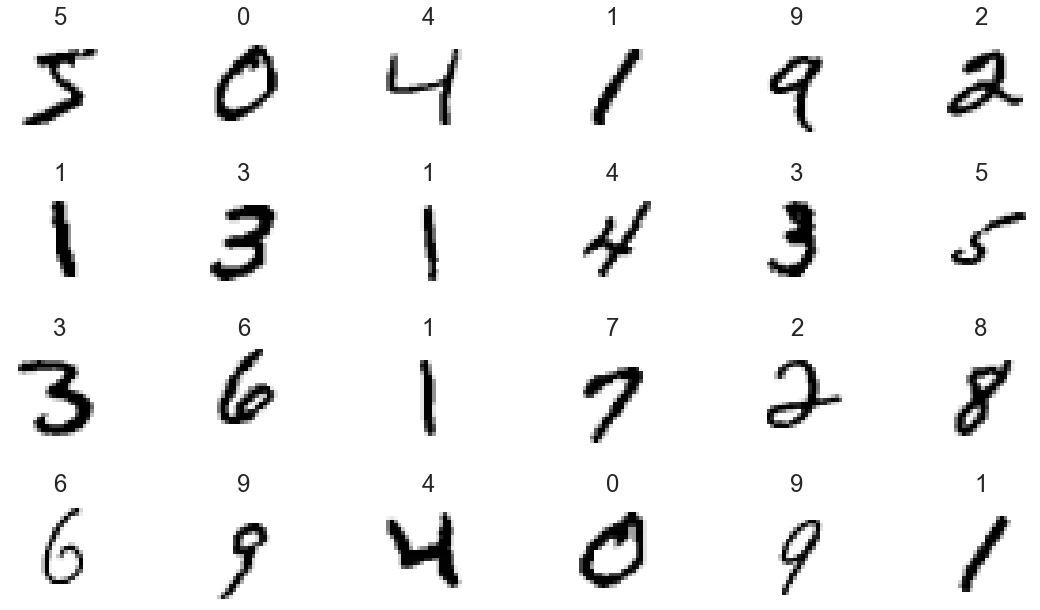

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [32]:
cnn.add(Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [35]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image
# plot_model(cnn, to_file='convnet.png', show_shapes=True, 
#            show_layer_names=True)
# Image(filename='convnet.png') 

In [36]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.1)

Epoch 1/2
844/844 [==============================] - 77s 90ms/step - loss: 0.3308 - accuracy: 0.8966 - val_loss: 0.0498 - val_accuracy: 0.9847
Epoch 2/2
844/844 [==============================] - 91s 107ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0367 - val_accuracy: 0.9900


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0330 - accuracy: 0.9889


In [39]:
loss

0.032953932881355286

In [40]:
accuracy

0.9889000058174133

In [41]:
predictions = cnn.predict(X_test)

In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000405244%
1: 0.0000001830%
2: 0.0016917229%
3: 0.0008655972%
4: 0.0000000005%
5: 0.0000000876%
6: 0.0000000001%
7: 99.9972105026%
8: 0.0000022490%
9: 0.0001901566%


In [44]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [45]:
len(incorrect_predictions)

111

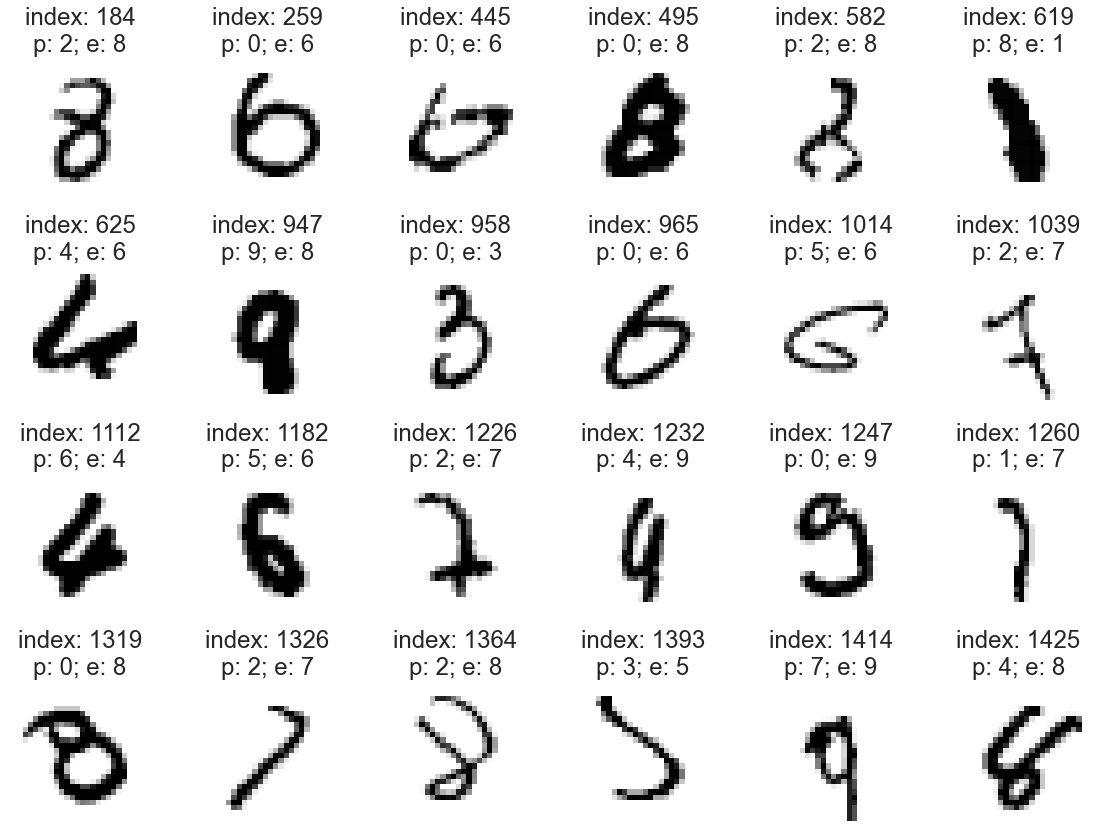

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [47]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [48]:
display_probabilities(predictions[495])

0: 33.7585180998%
1: 0.0001590268%
2: 32.0738315582%
3: 0.0368696754%
4: 0.0663862738%
5: 0.0184528210%
6: 18.1255877018%
7: 0.0000104165%
8: 15.9108251333%
9: 0.0093610404%


In [49]:
display_probabilities(predictions[583])

0: 0.0000032423%
1: 0.0000021489%
2: 99.2531597614%
3: 0.0254868064%
4: 0.0000000696%
5: 0.0000000001%
6: 0.0000000003%
7: 0.7147150580%
8: 0.0065550419%
9: 0.0000815228%


In [50]:
display_probabilities(predictions[625])

0: 0.0479204202%
1: 0.0011710178%
2: 0.1550770365%
3: 0.0000003225%
4: 55.3085625172%
5: 0.0005874225%
6: 44.4840401411%
7: 0.0000049813%
8: 0.0011136058%
9: 0.0015206459%


In [51]:
cnn.save('mnist_cnn.h5')

In [52]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################